# Infer model

In [1]:
import os
import sys

import cv2
from matplotlib import pyplot as plt

# To add src to the path so that we can import modules
current_directory = os.getcwd()
if not current_directory.endswith("emotion_recognition"):
    sys.path.append(os.path.join(current_directory, 'emotion_recognition'))

try:
    from src import INFERENCE_DIR
    from src.models.predict_model import load_models, infer_image
except ModuleNotFoundError:
    print("Ensure that src is added to PATH and restart the kernel")
    print(sys.path)



First load the models

In [2]:
face_model, emotion_model, face_transforms, device = load_models("iconic-sweep-19", face_detector_size = "medium")

wandb: Currently logged in as: armand-07. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/usuaris/imatge/armand.de.asis/.netrc


Using trained model: iconic-sweep-19


wandb: Downloading large artifact model_iconic-sweep-19:latest, 90.04MB. 2 files... 
wandb:   2 of 2 files downloaded.  
Done. 0:0:0.5


Artifact downloaded to: /home/usuaris/imatge/armand.de.asis/artifacts/model_iconic-sweep-19:v0
Using CUDA with 1 GPUs
Using CUDA device:NVIDIA GeForce GTX 1080 Ti
Creating model with architecture: resnet50
Using pre-trained weights: False
Using custom weights of type <class 'collections.OrderedDict'>: 


Time to detect faces: 0.06637167930603027
Number of faces detected: 5
['Happy', 'Contempt', 'Anger', 'Happy', 'Happy']
Time to predict emotions: 0.02970433235168457
Time to plot: 0.0009508132934570312
Total time: 0.09734988212585449


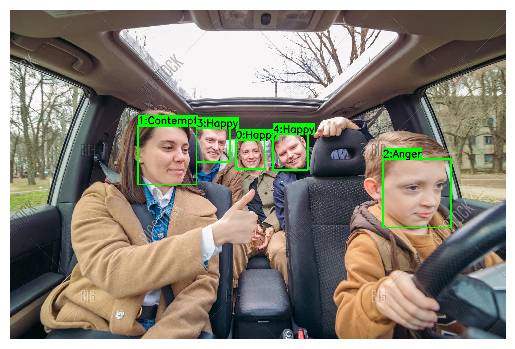

Time to detect faces: 0.05776810646057129
Number of faces detected: 5
['Happy', 'Happy', 'Happy', 'Sad', 'Happy']
Time to predict emotions: 0.017747163772583008
Time to plot: 0.002949953079223633
Total time: 0.07885265350341797


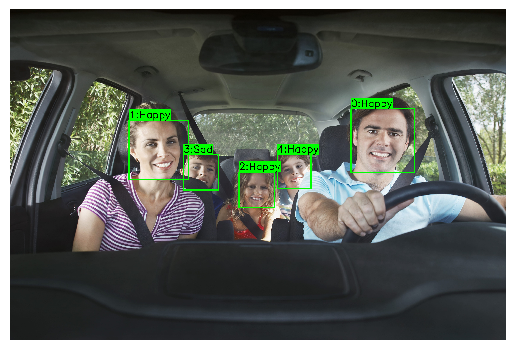

Time to detect faces: 0.02622509002685547
Number of faces detected: 5
['Happy', 'Happy', 'Happy', 'Happy', 'Happy']
Time to predict emotions: 0.016677379608154297
Time to plot: 0.00022149085998535156
Total time: 0.04342937469482422


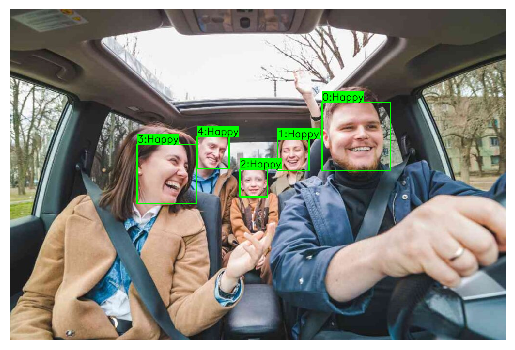

In [4]:
images = ['test1.jpg', 'test2.jpg', 'test3.jpg']
for image in images:
    path = os.path.join(INFERENCE_DIR, image)
    if not os.path.exists(path):
        raise FileNotFoundError(f"File {path} not found")
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = infer_image(img, face_model, emotion_model, device, face_transforms)
    plt.imshow(img, interpolation='nearest')
    plt.axis('off')
    plt.show()